<a href="https://colab.research.google.com/github/Purohit1999/Data_Science/blob/main/SalesData_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing Values:
 OrderID       0
CustomerID    0
Region        0
Product       0
Category      0
Quantity      0
Price         0
TotalSales    0
OrderDate     0
year          0
dtype: int64

Summary Statistics:
          Quantity        Price     TotalSales                   OrderDate  \
count  500.000000   500.000000     500.000000                         500   
mean   152.946000   980.050240  146770.989660  2023-06-15 23:36:57.600000   
min      1.000000    13.370000     614.710000         2021-12-06 00:00:00   
25%     73.750000   493.772500   39176.475000         2022-09-09 18:00:00   
50%    152.000000  1002.160000  109335.820000         2023-06-27 00:00:00   
75%    231.000000  1456.572500  236854.882500         2024-03-11 00:00:00   
max    300.000000  1999.820000  576928.720000         2024-12-05 00:00:00   
std     87.662812   572.593943  129671.600867                         NaN   

              year  
count   500.000000  
mean   2022.944000  
min    2021.000000  
25%    202

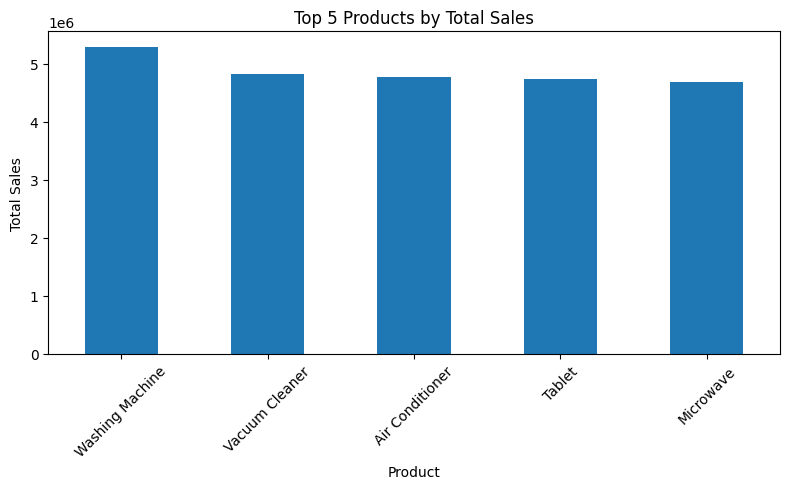

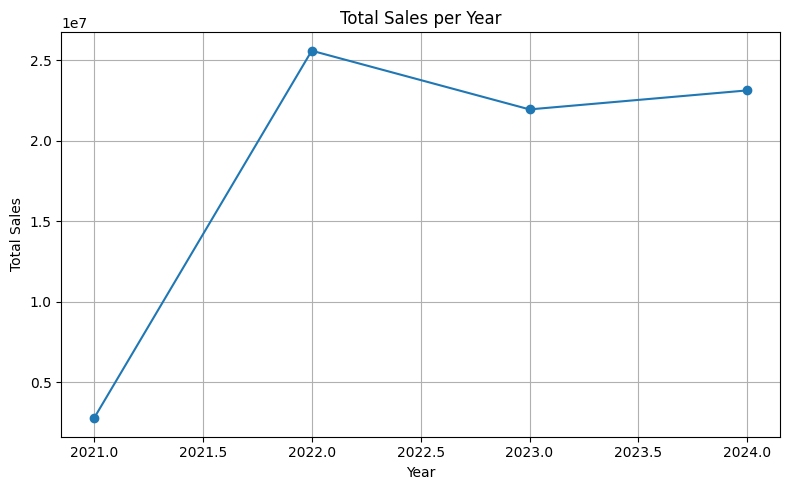

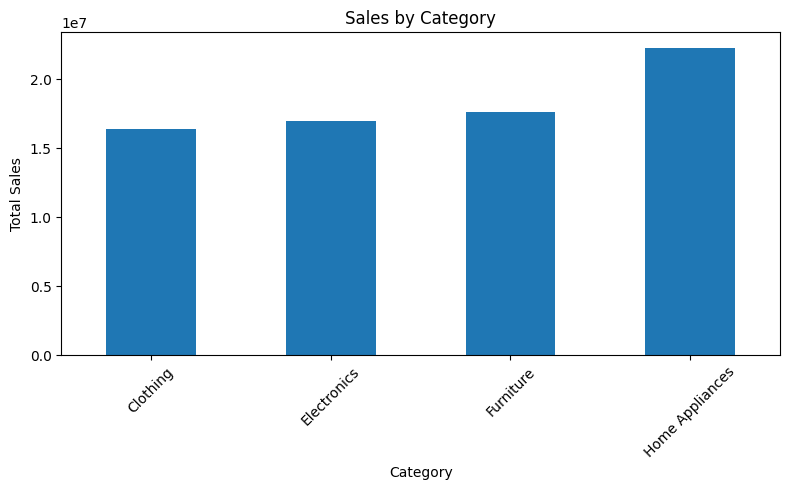

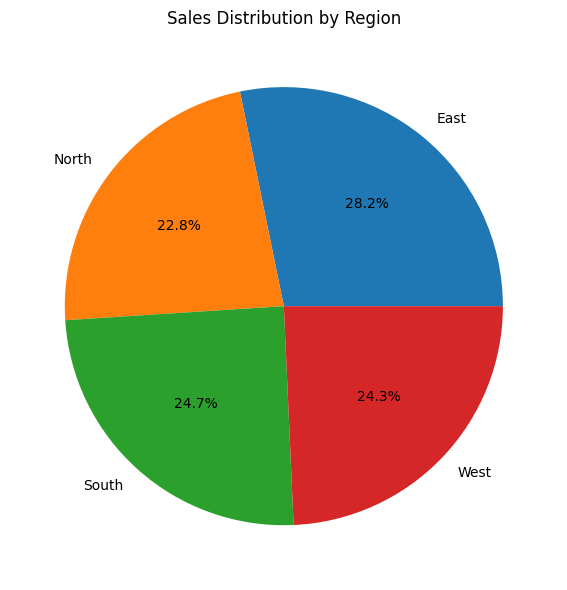

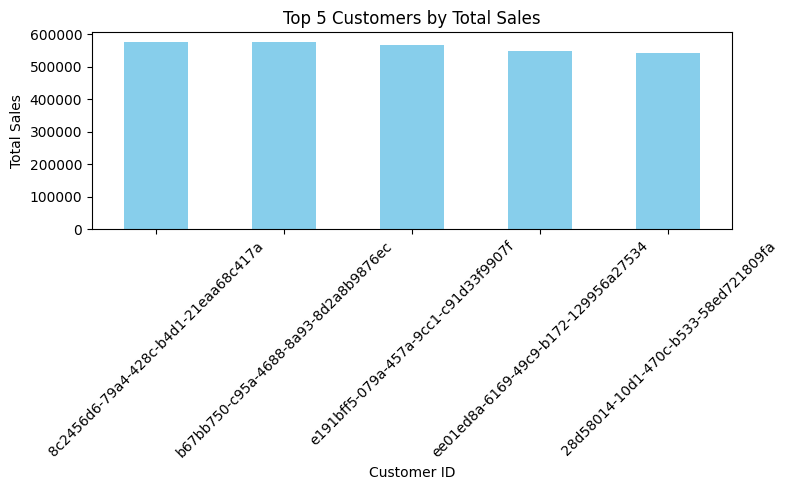

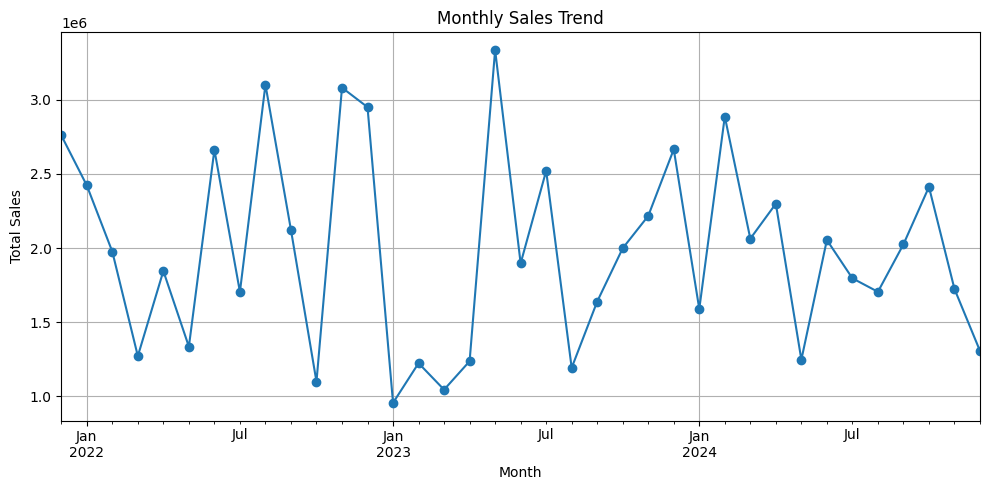

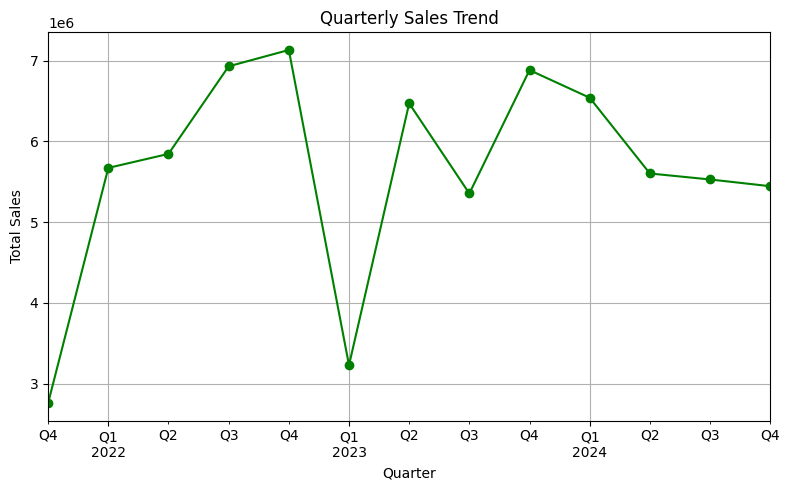

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
sales_data = pd.read_csv('/content/sales_dataset.csv')

# Drop unnecessary index column
sales_data.drop(columns=['Unnamed: 0'], inplace=True)

# Convert 'OrderDate' to datetime format
sales_data['OrderDate'] = pd.to_datetime(sales_data['OrderDate'])

# ------------------ Basic Data Cleaning & Summary ------------------

# Check for missing values
print("Missing Values:\n", sales_data.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n", sales_data.describe())

# ------------------ Visual Insights ------------------

# 1. Top 5 Products by Total Sales
top_products = sales_data.groupby('Product')['TotalSales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
top_products.plot(kind='bar')
plt.title('Top 5 Products by Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Total Sales per Year
yearly_sales = sales_data.groupby('year')['TotalSales'].sum()

plt.figure(figsize=(8, 5))
yearly_sales.plot(marker='o')
plt.title('Total Sales per Year')
plt.ylabel('Total Sales')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Sales by Category
category_sales = sales_data.groupby('Category')['TotalSales'].sum()

plt.figure(figsize=(8, 5))
category_sales.plot(kind='bar')
plt.title('Sales by Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Region-wise Sales Distribution (Pie Chart)
region_sales = sales_data.groupby('Region')['TotalSales'].sum()

plt.figure(figsize=(6, 6))
region_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.tight_layout()
plt.show()

# ------------------ Additional Insights ------------------

# 5. Top 5 Customers by Total Sales
top_customers = sales_data.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
top_customers.plot(kind='bar', color='skyblue')
plt.title('Top 5 Customers by Total Sales')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Monthly Sales Trend
sales_data['Month'] = sales_data['OrderDate'].dt.to_period('M')
monthly_sales = sales_data.groupby('Month')['TotalSales'].sum()

plt.figure(figsize=(10, 5))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Quarterly Sales Trend
sales_data['Quarter'] = sales_data['OrderDate'].dt.to_period('Q')
quarterly_sales = sales_data.groupby('Quarter')['TotalSales'].sum()

plt.figure(figsize=(8, 5))
quarterly_sales.plot(marker='o', color='green')
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


Total Orders: 500
Total Revenue: £73,385,494.83
Average Order Value: £146,770.99
Unique Customers: 500
Repeat Customer Rate: 0.00%


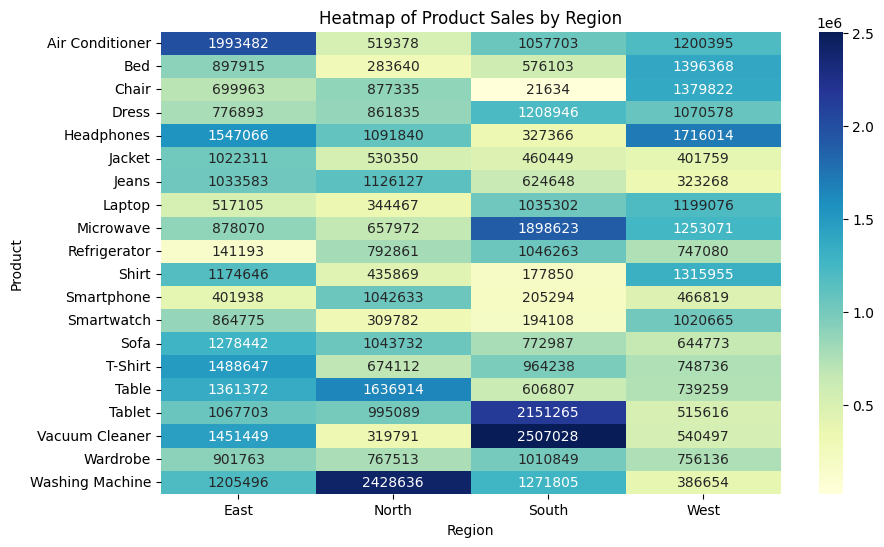

/tmp/ipython-input-3-3871616457.py:46: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = sales_data.resample("M", on="OrderDate").sum(numeric_only=True).reset_index()[["OrderDate", "TotalSales"]]
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp0p3damr/lgv9qibt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp0p3damr/yx8tx4su.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38667', 'data', 'file=/tmp/tmpp0p3damr/lgv9qibt.json', 'init=/tmp/tmpp0p3damr/yx8tx4su.json', 'output', 'file=/tmp/tmpp0p3damr/prophet_modelhihy0sl6/prophet_model-20250712105947.csv', 'method=optimize', 'algori

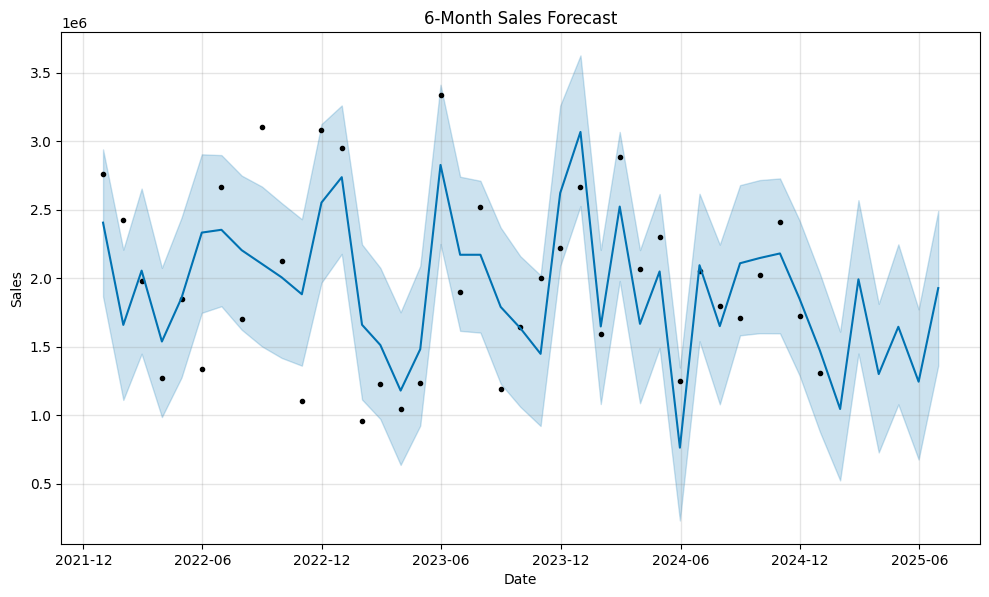

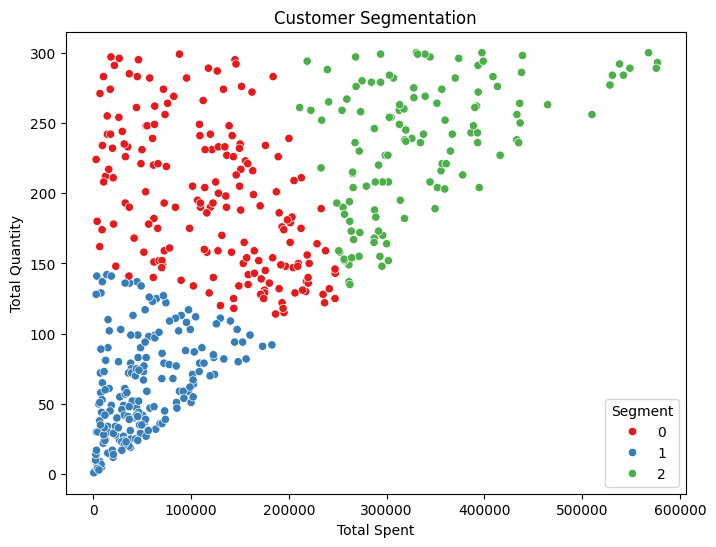

         TotalOrders     TotalSpent  TotalQuantity
Segment                                           
0                1.0  120960.489500     195.794444
1                1.0   49791.057641      60.733333
2                1.0  335226.803840     235.096000


In [3]:
# Step 1: Install Libraries (run only once)
# pip install pandas matplotlib seaborn prophet scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from prophet import Prophet
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load data
sales_data = pd.read_csv("sales_dataset.csv")
sales_data.drop(columns=["Unnamed: 0"], inplace=True)
sales_data["OrderDate"] = pd.to_datetime(sales_data["OrderDate"])

# ---------- Business KPIs ----------
total_orders = sales_data['OrderID'].nunique()
total_revenue = sales_data['TotalSales'].sum()
average_order_value = total_revenue / total_orders
unique_customers = sales_data['CustomerID'].nunique()

print(f"Total Orders: {total_orders}")
print(f"Total Revenue: £{total_revenue:,.2f}")
print(f"Average Order Value: £{average_order_value:,.2f}")
print(f"Unique Customers: {unique_customers}")

# ---------- Product Insights ----------
top_quantity = sales_data.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)
top_revenue = sales_data.groupby('Product')['TotalSales'].sum().sort_values(ascending=False).head(5)
std_dev_sales = sales_data.groupby('Product')['TotalSales'].std().sort_values().head(5)

# ---------- Customer Insights ----------
customer_orders = sales_data.groupby("CustomerID")["OrderID"].nunique()
repeat_customer_rate = (customer_orders[customer_orders > 1].count() / unique_customers) * 100
print(f"Repeat Customer Rate: {repeat_customer_rate:.2f}%")

# ---------- Heatmap ----------
heatmap_data = sales_data.pivot_table(index="Product", columns="Region", values="TotalSales", aggfunc="sum")
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap of Product Sales by Region")
plt.show()

# ---------- Time Series Forecasting (Monthly) ----------
monthly_data = sales_data.resample("M", on="OrderDate").sum(numeric_only=True).reset_index()[["OrderDate", "TotalSales"]]
monthly_data.columns = ["ds", "y"]

model = Prophet()
model.fit(monthly_data)
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

model.plot(forecast)
plt.title("6-Month Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# ---------- Customer Segmentation ----------
customer_df = sales_data.groupby("CustomerID").agg({
    "OrderID": "nunique",
    "TotalSales": "sum",
    "Quantity": "sum"
}).reset_index()
customer_df.columns = ["CustomerID", "TotalOrders", "TotalSpent", "TotalQuantity"]

# Scale data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_df[["TotalOrders", "TotalSpent", "TotalQuantity"]])

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_df["Segment"] = kmeans.fit_predict(scaled_features)

# Plot Segments
plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_df, x="TotalSpent", y="TotalQuantity", hue="Segment", palette="Set1")
plt.title("Customer Segmentation")
plt.xlabel("Total Spent")
plt.ylabel("Total Quantity")
plt.show()

# Cluster Summary
print(customer_df.groupby("Segment")[["TotalOrders", "TotalSpent", "TotalQuantity"]].mean())


----- BUSINESS KPIs -----
Total Orders: 500
Total Revenue: £73,385,494.83
Average Order Value: £146,770.99
Unique Customers: 500

----- PRODUCT PERFORMANCE -----
Top 5 Products by Quantity:
 Product
Microwave          5022
Vacuum Cleaner     4895
Air Conditioner    4767
T-Shirt            4653
Washing Machine    4645
Name: Quantity, dtype: int64
Top 5 Products by Revenue:
 Product
Washing Machine    5292590.85
Vacuum Cleaner     4818765.01
Air Conditioner    4770957.37
Tablet             4729672.39
Microwave          4687735.02
Name: TotalSales, dtype: float64
Most Stable Products (Low Std Dev in Sales):
 Product
Smartphone     97866.030975
Bed            99766.210118
Shirt         104022.573984
Smartwatch    109336.951067
Laptop        115758.101608
Name: TotalSales, dtype: float64

Repeat Customer Rate: 0.00%


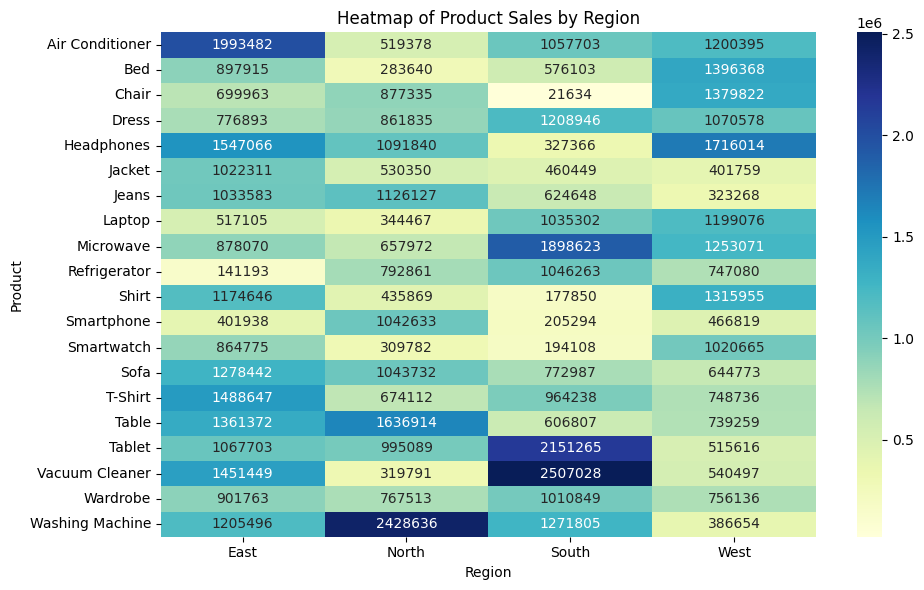

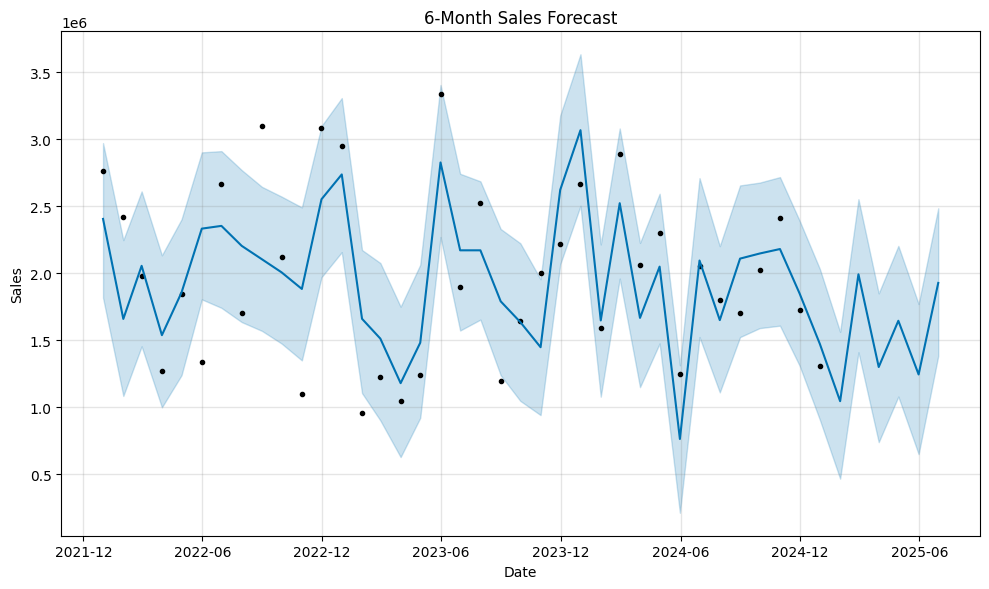

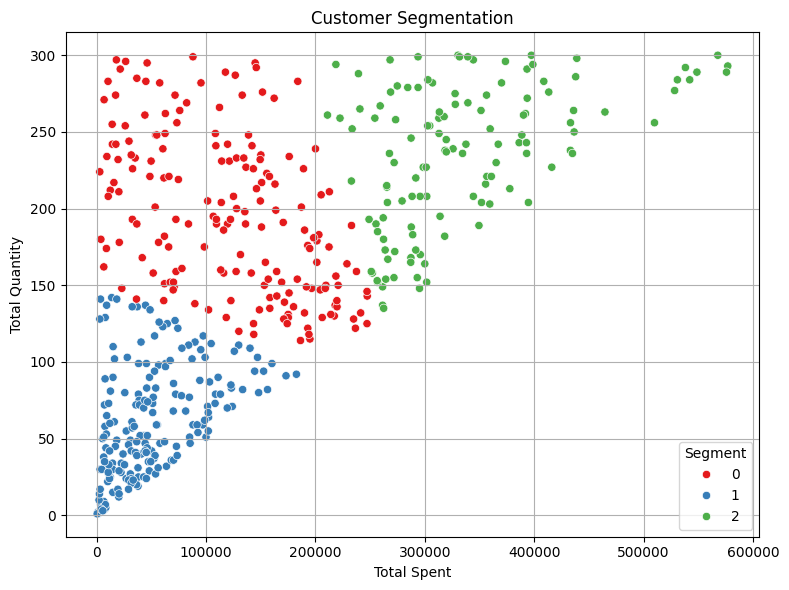


----- CUSTOMER SEGMENT SUMMARY -----
         TotalOrders     TotalSpent  TotalQuantity
Segment                                           
0                1.0  120960.489500     195.794444
1                1.0   49791.057641      60.733333
2                1.0  335226.803840     235.096000


In [6]:
# Step 1: Install required packages (run once)
# !pip install prophet scikit-learn pandas matplotlib seaborn

# Step 2: Import libraries and suppress verbose logs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import logging
import warnings
from prophet import Prophet
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Suppress Prophet and CmdStanPy logs
# Suppress logs and future warnings
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)
warnings.filterwarnings("ignore", category=FutureWarning)

# Step 3: Load and clean dataset
sales_data = pd.read_csv("sales_dataset.csv")
sales_data.drop(columns=["Unnamed: 0"], inplace=True)
sales_data["OrderDate"] = pd.to_datetime(sales_data["OrderDate"])

# Step 4: Business KPIs
total_orders = sales_data['OrderID'].nunique()
total_revenue = sales_data['TotalSales'].sum()
average_order_value = total_revenue / total_orders
unique_customers = sales_data['CustomerID'].nunique()

print("----- BUSINESS KPIs -----")
print(f"Total Orders: {total_orders}")
print(f"Total Revenue: £{total_revenue:,.2f}")
print(f"Average Order Value: £{average_order_value:,.2f}")
print(f"Unique Customers: {unique_customers}")

# Step 5: Product Performance
top_quantity = sales_data.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)
top_revenue = sales_data.groupby('Product')['TotalSales'].sum().sort_values(ascending=False).head(5)
std_dev_sales = sales_data.groupby('Product')['TotalSales'].std().sort_values().head(5)

print("\n----- PRODUCT PERFORMANCE -----")
print("Top 5 Products by Quantity:\n", top_quantity)
print("Top 5 Products by Revenue:\n", top_revenue)
print("Most Stable Products (Low Std Dev in Sales):\n", std_dev_sales)

# Step 6: Customer Insights
customer_orders = sales_data.groupby("CustomerID")["OrderID"].nunique()
repeat_customer_rate = (customer_orders[customer_orders > 1].count() / unique_customers) * 100

print(f"\nRepeat Customer Rate: {repeat_customer_rate:.2f}%")

# Step 7: Heatmap - Product vs Region
heatmap_data = sales_data.pivot_table(index="Product", columns="Region", values="TotalSales", aggfunc="sum")
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap of Product Sales by Region")
plt.tight_layout()
plt.show()

# Step 8: Forecasting Sales with Prophet
monthly_data = sales_data.resample("ME", on="OrderDate").sum(numeric_only=True).reset_index()[["OrderDate", "TotalSales"]]
monthly_data.columns = ["ds", "y"]

model = Prophet()
model.fit(monthly_data)

future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

model.plot(forecast)
plt.title("6-Month Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

# Step 9: Customer Segmentation using KMeans
customer_df = sales_data.groupby("CustomerID").agg({
    "OrderID": "nunique",
    "TotalSales": "sum",
    "Quantity": "sum"
}).reset_index()

customer_df.columns = ["CustomerID", "TotalOrders", "TotalSpent", "TotalQuantity"]

# Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_df[["TotalOrders", "TotalSpent", "TotalQuantity"]])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_df["Segment"] = kmeans.fit_predict(scaled_data)

# Plot customer clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_df, x="TotalSpent", y="TotalQuantity", hue="Segment", palette="Set1")
plt.title("Customer Segmentation")
plt.xlabel("Total Spent")
plt.ylabel("Total Quantity")
plt.grid(True)
plt.tight_layout()
plt.show()

# Segment summary
print("\n----- CUSTOMER SEGMENT SUMMARY -----")
print(customer_df.groupby("Segment")[["TotalOrders", "TotalSpent", "TotalQuantity"]].mean())
